In [1]:
import pandas as pd
from semcor_bert_pipeline import *
from clustering import *

In [2]:
model = initialize_model()
tbl_results = run_pipeline('table', 'n', model)

Getting data from SEMCOR
Senses for word table.n
Getting sentences for relevant senses
Senses for word table.n
Number of sentences for sense Synset('table.n.01') 52
Number of sentences for sense Synset('table.n.02') 25
Generating BERT embeddings


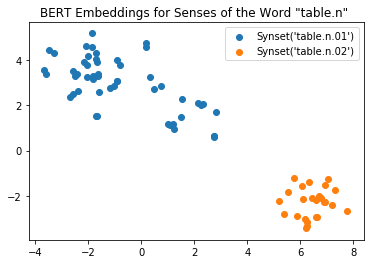

In [3]:
tsne_results = plot_embeddings(tbl_results['embeddings'],
                               tbl_results['sense_indices'], tbl_results['sense_names'], tbl_results['lemma'],
                               savefile = True)

In [4]:
color_dict, label_dict = create_dendrogram_colors(tbl_results['sense_names'])

In [66]:
def plot_dendrogram_r(embed_data, color_dict, label_dict, savefile = False):
    #color_dict is of format: {sense_name: color_str...}
    #label_dict is of format: {index: {'color': char, 'label': sense label}}
    
    embeds = [v.numpy() for v in embed_data['embeddings']]
    Z = linkage(embeds, method = 'single', metric = 'cosine')
    plt.figure(figsize = (11, 6))
    dendrogram(Z, labels = embed_data['sense_labels'], link_color_func=lambda k: 'gray')
    ax = plt.gca()
    xlbls = ax.get_xmajorticklabels()
    for lbl in xlbls:
        lbl.set_color(color_dict[lbl.get_text()])

    leg_patches = [mpatches.Patch(color = label_dict[i]['color'],
                                label = label_dict[i]['label']) for i in np.arange(len(label_dict))]
    plt.legend(handles=leg_patches)
    plt.title("Nearest Neighbor Dendrogram for BERT Embeddings of " + embed_data['lemma'] + " in SEMCOR")
    if savefile:
        word_name = embed_data['lemma']
        word_token, word_pos = get_name(word_name), get_pos(word_name)
        path = os.path.join('data', 'clustering_results', word_token + '_' + word_pos, 'dendrogram.png')
        plt.savefig(path)



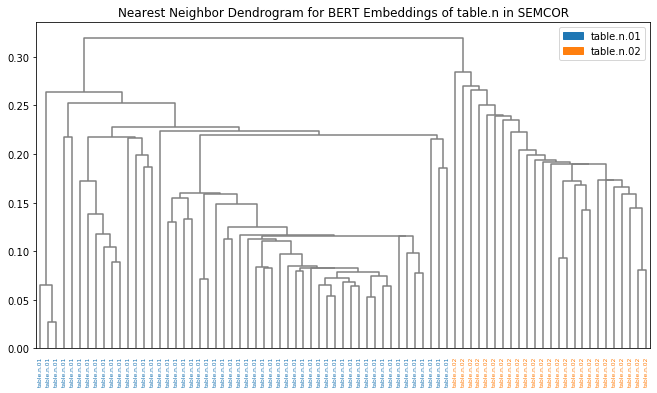

In [67]:
plot_dendrogram_r(tbl_results, color_dict, label_dict, savefile = True)

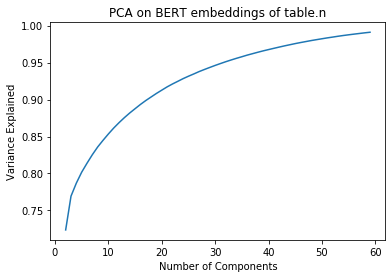

In [30]:
plot_pca_ev(range(2, 60), tbl_results['embeddings'], 'table.n')

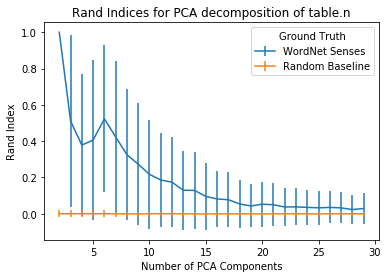

In [7]:
testing_json = plot_gmm_rand_indices(tbl_results, range(2, 30), savefile = True)

In [8]:
import os

In [34]:
!pip install fpdf

  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40722 sha256=917cce963810a43e2b4cc58b18baec7eac07672598ef0be58dd714fc4fb31830
  Stored in directory: /Users/sathvik/Library/Caches/pip/wheels/9a/e9/77/4554ff5c99bc3f487c8d69620d8c41d99d54e9c54ab20ef4c9
Successfully built fpdf


In [70]:
from fpdf import FPDF

In [71]:
def convert_imgs_to_pdf(name, pos):
    pdf = FPDF('L') 
    pdf.set_auto_page_break(0)
    img_fpath = os.path.join('data', 'clustering_results', name + '_' + pos)
    img_files = [i for i in os.listdir(img_fpath) if i.endswith('png')]

    for f in img_files:
        pdf.add_page()
        path = os.path.join(img_fpath, f)
        pdf.image(path, 0, 0)

    pdf.output("../results/clustering_images/" + name + "_" + pos + ".pdf", "F")

In [72]:
convert_imgs_to_pdf('table', 'n')